# Pre proccessing (Scalling)

Units are changed, but the distance between points is preserved.


**imports**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import sys

sys.path.append("./util_")
import prepare_

**get data and split**

In [87]:
# read data
zillow = prepare_.wrangle_zillow()

# split data
train, validate, test = prepare_.split_data_(df=zillow, test_size=0.2, random_state=95)
(train.shape, validate.shape, test.shape)

((1278128, 7), (426043, 7), (426043, 7))

In [88]:
train.head()

,bedrooms,bathrooms,sqr_feet,tax_value,year_built,tax_amount,county
1570665,4,3.5,2792.0,990859.0,1997,11865.52,6059.0
1577693,2,1.0,940.0,324273.0,1947,3850.78,6037.0
2111909,4,2.0,1752.0,256915.0,1989,2605.37,6037.0
267891,4,2.0,1576.0,418540.0,1973,4559.80,6059.0
825703,3,2.0,1448.0,480000.0,1973,5860.34,6037.0


## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [89]:
# separate the features from target
x_train = train.drop(columns="tax_value", axis=0).head(1000)
train_target =train.tax_value.head(1000)

### Min Max Scalling

- MinMax: everything between 0 and 1

    $$ x' = \frac{x - \text{max}(x)}{\text{max}(x) - \text{min}(x)} $$

In [111]:
# build a scaling object
scaler = sklearn.preprocessing.MinMaxScaler()

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# y Target values: this is not being changed in any way(no predictions are being made)
x_train_scaled = scaler.fit_transform(X=x_train, y=train_target)

# x_validate_scaled = scaler.transform(x_validate)
# x_test_scaled = scaler.transform(x_test)

In [91]:
# convert to dataframe
x_train_norm = pd.DataFrame(x_train_scaled)

# rename the scalled columns to the original columns
for i, j in enumerate(x_train.columns):
    x_train_norm = x_train_norm.rename(columns={i:j})
                                 
x_train_norm.head()

,bedrooms,bathrooms,sqr_feet,year_built,tax_amount,county
0,0.444444,0.388889,0.258358,0.856,0.050348,0.297297
1,0.222222,0.111111,0.075173,0.456,0.016110,0.000000
2,0.444444,0.222222,0.155490,0.792,0.010790,0.000000
3,0.444444,0.222222,0.138081,0.664,0.019139,0.297297
4,0.333333,0.222222,0.125420,0.664,0.024695,0.000000


**Original**

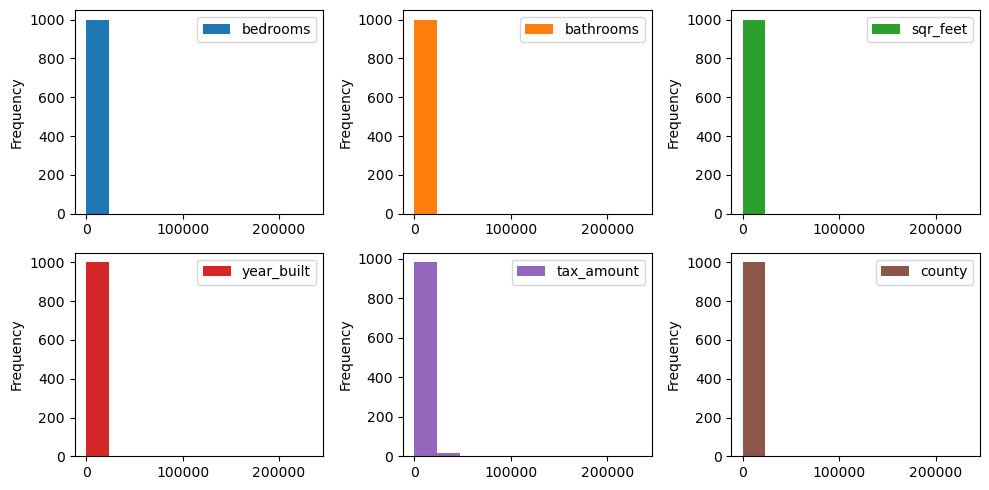

In [92]:
# create subpots of distribution of the features
x_train.plot.hist(subplots=True, layout=(2, 3), figsize=(10, 5),
              sharex=False, sharey=False, legend=True)
plt.tight_layout()

**Scaled**

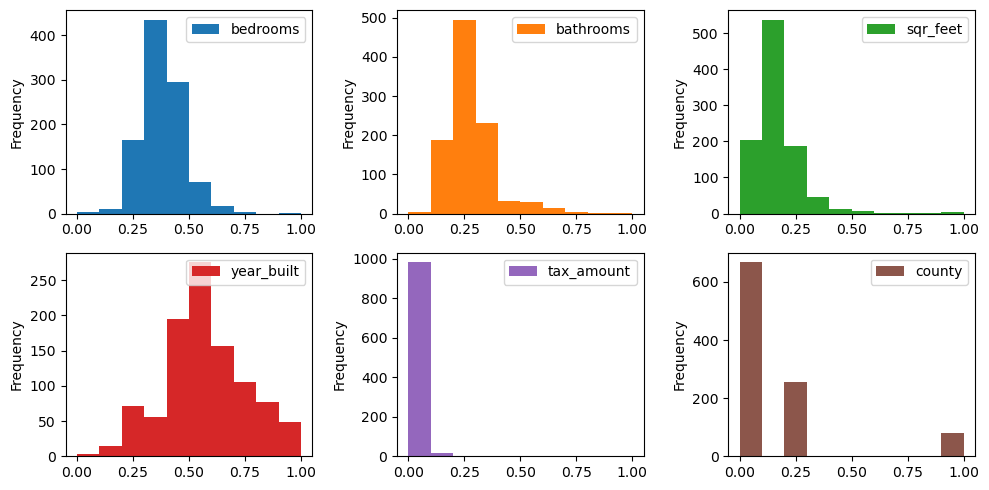

In [93]:
# create subpots of distribution of the features
x_train_norm.plot.hist(subplots=True, layout=(2, 3), figsize=(10, 5),
              sharex=False, sharey=False, legend=True)
plt.tight_layout()

**Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?**

In [114]:
# Apply the .inverse_transform method to your scaled data (get the original data results)
inv_trans = scaler.inverse_transform(X=x_train_scaled)
pd.DataFrame(inv_trans).head()

,0,1,2,3,4,5
0,4.0,3.5,2792.0,1997.0,11865.52,6059.0
1,2.0,1.0,940.0,1947.0,3850.78,6037.0
2,4.0,2.0,1752.0,1989.0,2605.37,6037.0
3,4.0,2.0,1576.0,1973.0,4559.80,6059.0
4,3.0,2.0,1448.0,1973.0,5860.34,6037.0


## Standard Scalling (z-score scaling)


- Standard: a zscore, standard deviations from the mean, **center** + **scale**

    $$ x' = \frac{x - \bar{x}}{s_x} $$

    - **centering**: subtracting the mean
    - **scaling**: dividing by the standard deviation

In [94]:
# build a scaling object
scaler = sklearn.preprocessing.StandardScaler()

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# y Target values: this is not being changed in any way(no predictions are being made)
x_train_scaled = scaler.fit_transform(X=x_train, y=train_target)

# x_validate_scaled = scaler.transform(x_validate)
# x_test_scaled = scaler.transform(x_test)


In [95]:
# convert to dataframe
x_train_norm = pd.DataFrame(x_train_scaled)

# rename the scalled columns to the original columns
for i, j in enumerate(x_train.columns):
    x_train_norm = x_train_norm.rename(columns={i:j})
                                 
x_train_norm.head()

,bedrooms,bathrooms,sqr_feet,year_built,tax_amount,county
0,0.700669,1.142119,0.907400,1.567016,0.598001,0.512645
1,-1.345079,-1.259309,-0.940313,-0.658922,-0.206757,-0.554759
2,0.700669,-0.298738,-0.130193,1.210866,-0.331809,-0.554759
3,0.700669,-0.298738,-0.305786,0.498566,-0.135565,0.512645
4,-0.322205,-0.298738,-0.433489,0.498566,-0.004978,-0.554759


**Original**

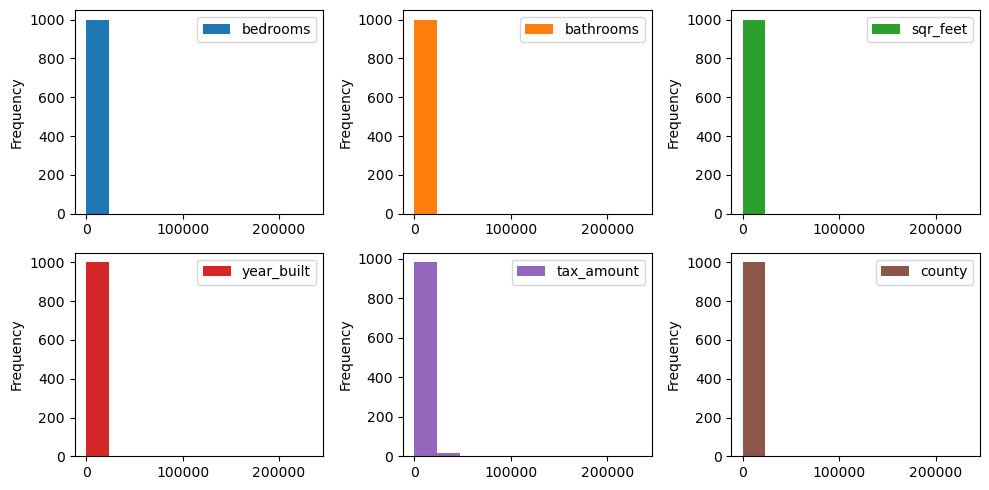

In [97]:
# create subpots of distribution of the features
x_train.plot.hist(subplots=True, layout=(2, 3), figsize=(10, 5),
              sharex=False, sharey=False, legend=True)
plt.tight_layout()

**Scaled**

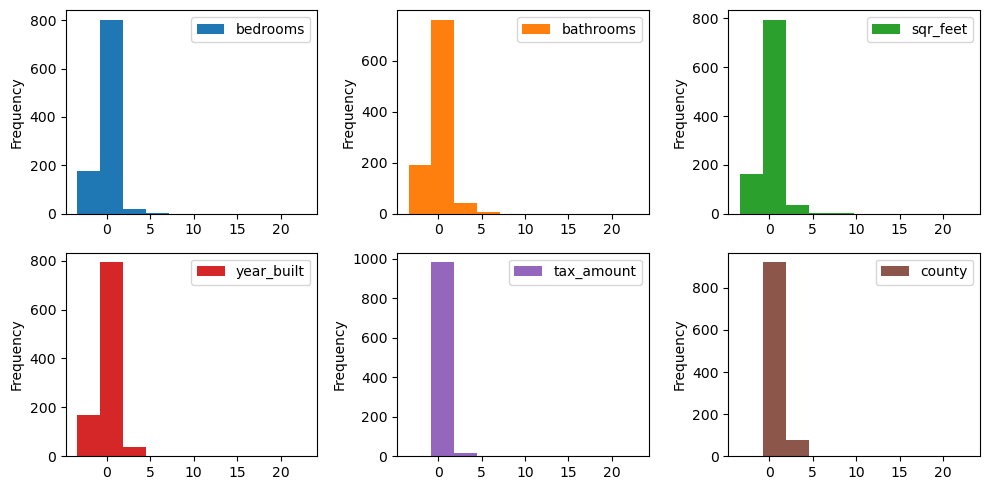

In [98]:
# create subpots of distribution of the features
x_train_norm.plot.hist(subplots=True, layout=(2, 3), figsize=(10, 5),
              sharex=False, sharey=False, legend=True)
plt.tight_layout()

**Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?**

In [115]:
# Apply the .inverse_transform method to your scaled data (get the original data results)
inv_trans = scaler.inverse_transform(X=x_train_scaled)
pd.DataFrame(inv_trans).head()

,0,1,2,3,4,5
0,4.0,3.5,2792.0,1997.0,11865.52,6059.0
1,2.0,1.0,940.0,1947.0,3850.78,6037.0
2,4.0,2.0,1752.0,1989.0,2605.37,6037.0
3,4.0,2.0,1576.0,1973.0,4559.80,6059.0
4,3.0,2.0,1448.0,1973.0,5860.34,6037.0


## Linear Scalling

- Robust: robust to and preserves outliers

    $$ x' = \frac{x - \text{med}(x)}{\text{IQR}_x} $$

In [106]:
# build a scaling object
scaler = sklearn.preprocessing.RobustScaler()

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# y Target values: this is not being changed in any way(no predictions are being made)
x_train_scaled = scaler.fit_transform(X=x_train, y=train_target)

# x_validate_scaled = scaler.transform(x_validate)
# x_test_scaled = scaler.transform(x_test)


In [107]:
# convert to dataframe
x_train_norm = pd.DataFrame(x_train_scaled)

# rename the scalled columns to the original columns
for i, j in enumerate(x_train.columns):
    x_train_norm = x_train_norm.rename(columns={i:j})
                                 
x_train_norm.head()

,bedrooms,bathrooms,sqr_feet,year_built,tax_amount,county
0,1.0,1.5,1.173625,1.407407,2.010661,1.0
1,-1.0,-1.0,-0.712322,-0.444444,-0.102843,0.0
2,1.0,0.0,0.114562,1.111111,-0.431260,0.0
3,1.0,0.0,-0.064664,0.518519,0.084128,1.0
4,0.0,0.0,-0.195010,0.518519,0.427083,0.0


**Original**

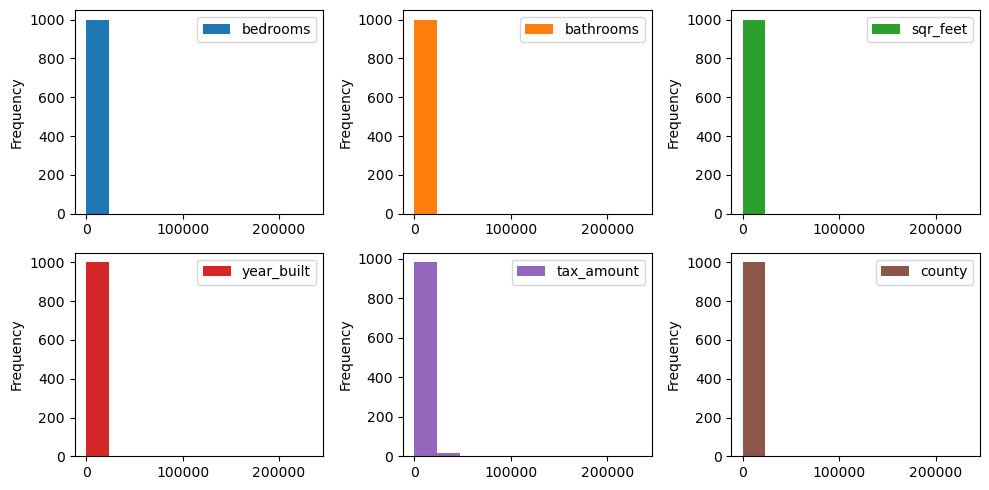

In [108]:
# create subpots of distribution of the features
x_train.plot.hist(subplots=True, layout=(2, 3), figsize=(10, 5),
              sharex=False, sharey=False, legend=True)
plt.tight_layout()

**Scaled**

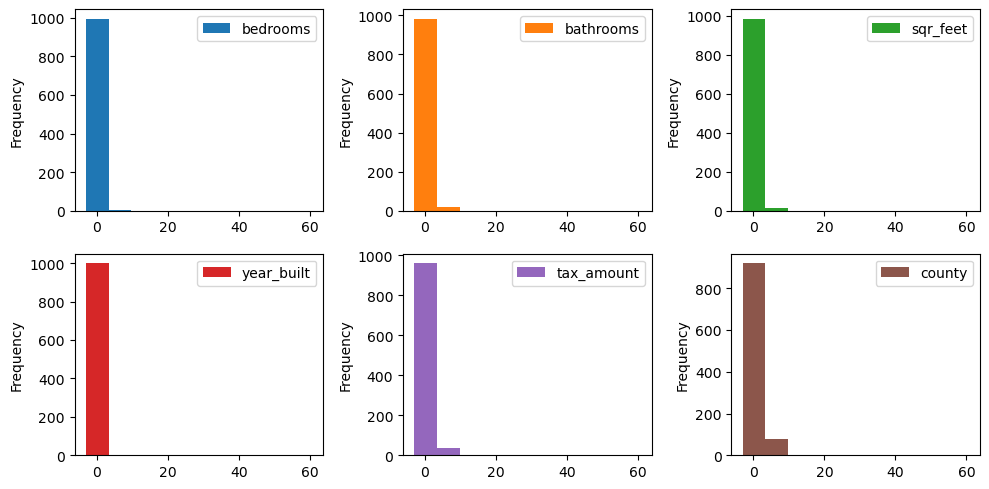

In [109]:
# create subpots of distribution of the features
x_train_norm.plot.hist(subplots=True, layout=(2, 3), figsize=(10, 5),
              sharex=False, sharey=False, legend=True)
plt.tight_layout()

**Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?**

In [116]:
# Apply the .inverse_transform method to your scaled data (get the original data results)
inv_trans = scaler.inverse_transform(X=x_train_scaled)
pd.DataFrame(inv_trans).head()

,0,1,2,3,4,5
0,4.0,3.5,2792.0,1997.0,11865.52,6059.0
1,2.0,1.0,940.0,1947.0,3850.78,6037.0
2,4.0,2.0,1752.0,1989.0,2605.37,6037.0
3,4.0,2.0,1576.0,1973.0,4559.80,6059.0
4,3.0,2.0,1448.0,1973.0,5860.34,6037.0


## (3) . Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

This is changing the data to a normal distribution

In [121]:
scaler = sklearn.preprocessing.QuantileTransformer( n_quantiles=1000, output_distribution='normal')

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# y Target values: this is not being changed in any way(no predictions are being made)
x_train_scaled = scaler.fit_transform(X=x_train, y=train_target)

# x_validate_scaled = scaler.transform(x_validate)
# x_test_scaled = scaler.transform(x_test)


# , ignore_implicit_zeros=False, subsample=10000, random_state=None, copy=True)
                                                
                                                

In [122]:
# convert to dataframe
x_train_norm = pd.DataFrame(x_train_scaled)

# rename the scalled columns to the original columns
for i, j in enumerate(x_train.columns):
    x_train_norm = x_train_norm.rename(columns={i:j})
                                 
x_train_norm.head()

,bedrooms,bathrooms,sqr_feet,year_built,tax_amount,county
0,0.705530,1.331018,1.174387,1.368450,1.475269,0.823172
1,-1.312981,-1.318946,-1.606755,-0.873515,-0.132113,-5.199338
2,0.705530,-0.239380,0.161281,1.090995,-0.676854,-5.199338
3,0.705530,-0.239380,-0.110627,0.552537,0.109365,0.823172
4,-0.267884,-0.239380,-0.317650,0.552537,0.506348,-5.199338


**Original**

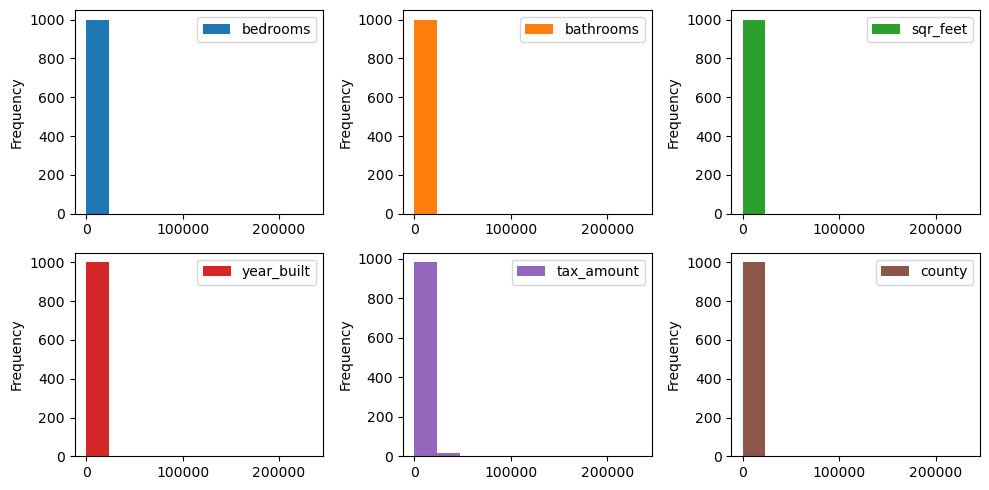

In [123]:
# create subpots of distribution of the features
x_train.plot.hist(subplots=True, layout=(2, 3), figsize=(10, 5),
              sharex=False, sharey=False, legend=True)
plt.tight_layout()

**Scaled**

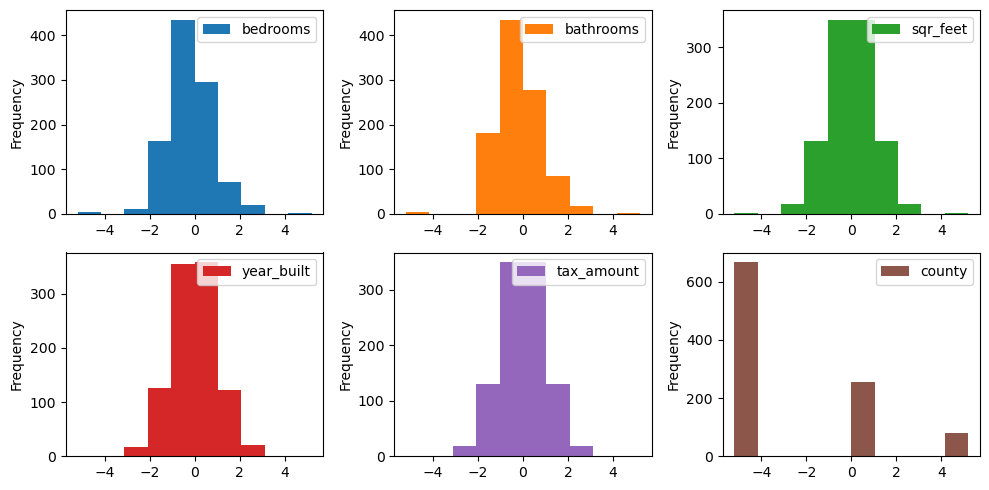

In [124]:
# create subpots of distribution of the features
x_train_norm.plot.hist(subplots=True, layout=(2, 3), figsize=(10, 5),
              sharex=False, sharey=False, legend=True)
plt.tight_layout()

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [137]:
scaler = sklearn.preprocessing.QuantileTransformer( n_quantiles=1000, output_distribution='uniform')

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# y Target values: this is not being changed in any way(no predictions are being made)
x_train_scaled = scaler.fit_transform(X=x_train, y=train_target)                                             
                                                

In [138]:
# convert to dataframe
x_train_norm = pd.DataFrame(x_train_scaled)

# rename the scalled columns to the original columns
for i, j in enumerate(x_train.columns):
    x_train_norm = x_train_norm.rename(columns={i:j})
                                 
x_train_norm.head()

,bedrooms,bathrooms,sqr_feet,year_built,tax_amount,county
0,0.759760,0.908408,0.879880,0.914414,0.929930,0.794795
1,0.094595,0.093594,0.054054,0.191191,0.447447,0.000000
2,0.759760,0.405405,0.564064,0.862362,0.249249,0.000000
3,0.759760,0.405405,0.455956,0.709710,0.543544,0.794795
4,0.394394,0.405405,0.375375,0.709710,0.693694,0.000000


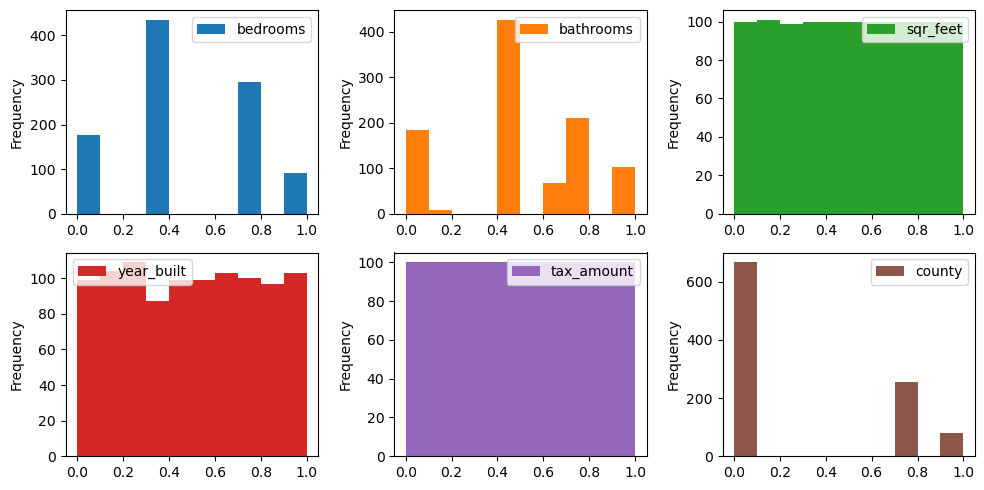

In [139]:
# create subpots of distribution of the features
x_train_norm.plot.hist(subplots=True, layout=(2, 3), figsize=(10, 5),
              sharex=False, sharey=False, legend=True)
plt.tight_layout()